$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [6]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data/train.csv'

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
train.head()

NameError: name 'train' is not defined

In [5]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

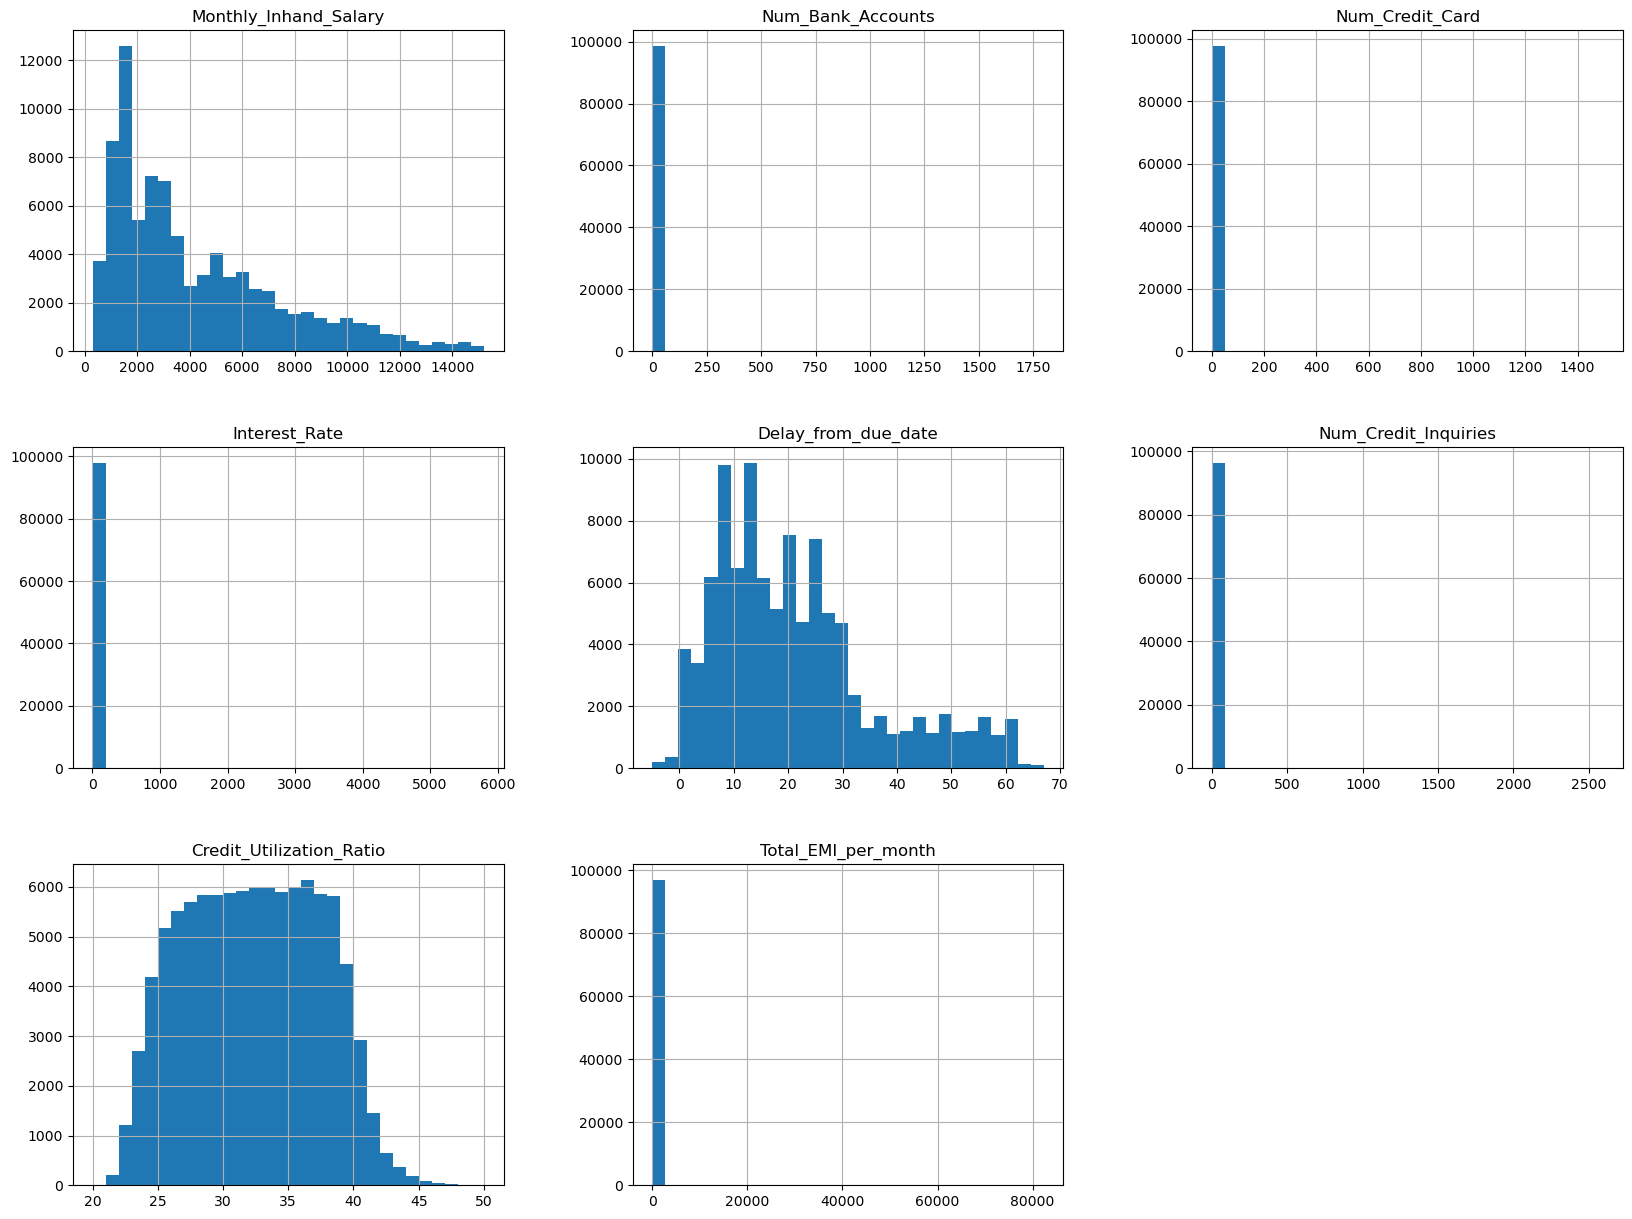

In [8]:
train.hist(bins=30, figsize=(20,15))
plt.show()

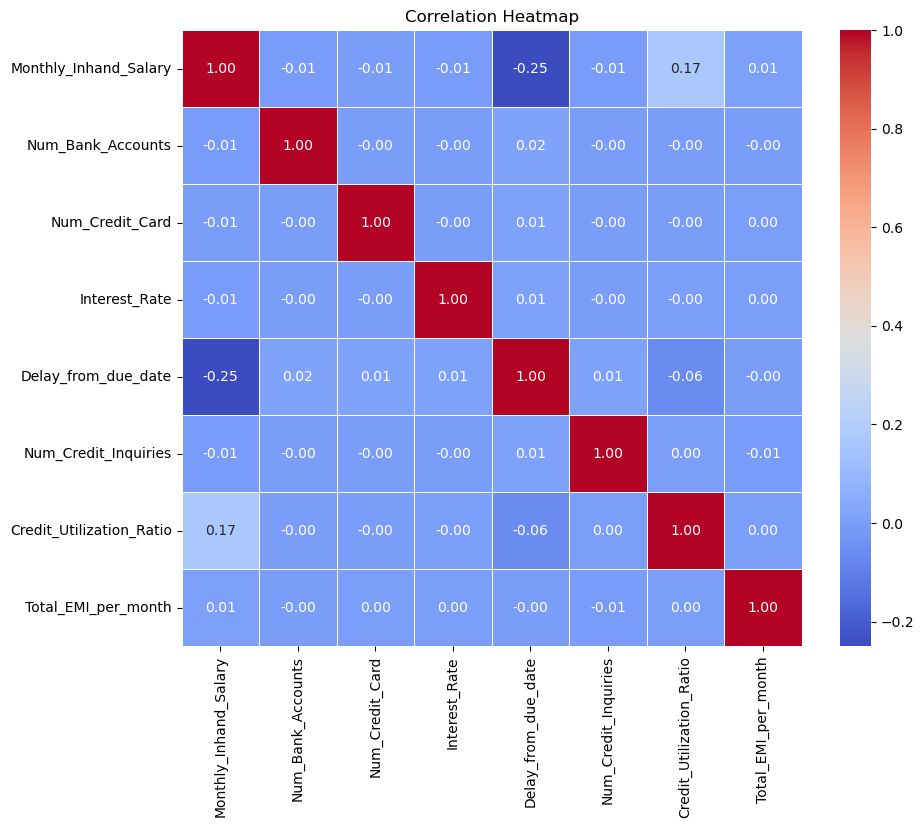

In [9]:
corr_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

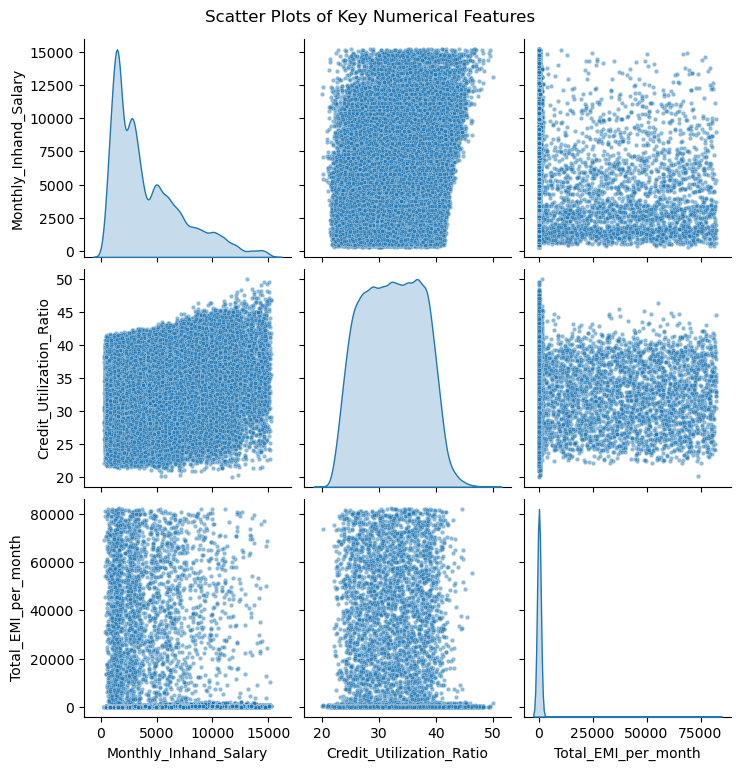

In [10]:
selected_num_cols = ["Monthly_Inhand_Salary","Credit_Utilization_Ratio", "Total_EMI_per_month"]

sns.pairplot(train[selected_num_cols], diag_kind="kde", plot_kws={'alpha':0.5, 's':10})
plt.suptitle("Scatter Plots of Key Numerical Features", y=1.02)
plt.show()


----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [11]:
# Clean Name Column

#find weird names
pattern = r"[^a-zA-Z\s\-']"  
weird_names = train[train["Name"].str.contains(pattern, regex=True, na=False)]

#fix weird char
train.loc[:, "Name"] = (
    train["Name"]
    .str.strip()  
    .str.replace(r'^[^a-zA-Z]+|[^a-zA-Z]+$', '', regex=True) 
    .str.replace(r'["]', '', regex=True) 
    )

In [12]:
# Clean Age column

#find weird char 
df_filtered = train[train["Age"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Age"].unique()) 

#fix weird char
train.loc[:, "Age"] = train["Age"].astype(str).str.extract(r'(\d+)')[0]

# Change to numeric
train.loc[:, "Age"] = pd.to_numeric(train["Age"], errors='coerce')

# Set range from 1 to 100
train.loc[(train["Age"] < 1) | (train["Age"] > 100), "Age"] = None


['-500' '28_' '34_' '30_' '24_' '33_' '35_' '31_' '40_' '37_' '54_' '21_'
 '20_' '43_' '38_' '18_' '2111_' '46_' '16_' '19_' '47_' '53_' '25_' '27_'
 '55_' '42_' '48_' '49_' '50_' '32_' '22_' '17_' '29_' '15_' '51_' '26_'
 '39_' '14_' '36_' '44_' '7670_' '45_' '23_' '41_' '52_' '733_' '5769_'
 '4383_' '56_' '2650_' '3307_' '6962_' '5589_' '6556_' '1447_' '8153_'
 '3834_' '6744_' '6471_' '7723_' '7640_' '6408_' '3502_' '7316_' '1102_'
 '8669_' '2463_' '6666_' '3055_' '1248_' '2220_' '2159_' '4583_' '3988_'
 '2155_' '6770_' '1843_' '1367_' '3742_' '2171_' '5109_' '3984_' '2474_'
 '5046_' '7715_' '2329_' '707_' '844_' '2756_' '2037_' '902_' '8523_'
 '3640_' '3998_' '3712_' '2097_' '8348_' '5373_' '3291_' '2994_' '3339_'
 '2812_' '3578_' '3564_' '1794_' '737_' '4301_' '2846_' '2373_' '1188_'
 '8207_' '5909_' '6381_' '8616_' '6799_' '1591_' '3775_' '6564_' '7122_'
 '4913_' '5697_' '3843_' '4445_' '6921_' '780_' '1070_' '5798_' '4808_']


In [13]:
# Clean SSN column

#find weird char 
df_filtered = train[train["SSN"].astype(str).str.contains(r"[^0-9\-]", regex=True)]
print(df_filtered["SSN"].unique()) 

# Remove weird char 
train.loc[~train["SSN"].astype(str).str.match(r'^\d{3}-\d{2}-\d{4}$', na=False), "SSN"] = None

['#F%$D@*&8']


In [14]:
# Clean Occupation Column 

valid_occupations = [
    'Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer', 
    'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager', 'Accountant',
    'Musician', 'Mechanic', 'Writer', 'Architect'
]

train.loc[~train["Occupation"].isin(valid_occupations), "Occupation"] = None

In [15]:
# Clean Annual_Income Column 

train.loc[train["Annual_Income"].astype(str).str.contains(r"[^0-9.]", regex=True), "Annual_Income"] = np.nan

In [16]:
# Clean Monthly_Inhand_Salary Column 

train.loc[train["Monthly_Inhand_Salary"].astype(str).str.contains(r"[^0-9.]", regex=True), "Monthly_Inhand_Salary"] = np.nan

In [17]:
# Clean Num_Bank_Accounts Column

#find weird char 
df_filtered = train[train["Num_Bank_Accounts"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Num_Bank_Accounts"].unique()) 

train.loc[(train["Num_Bank_Accounts"] < 0) | (train["Num_Bank_Accounts"] > 15), "Num_Bank_Accounts"] = np.nan

train["Num_Bank_Accounts"] = train["Num_Bank_Accounts"].astype("Int64")


[-1]


In [18]:
# Clean Num_Credit_Card Column

df_filtered = train[train["Num_Credit_Card"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Num_Credit_Card"].unique()) 


train.loc[(train["Num_Credit_Card"] < 0) | (train["Num_Credit_Card"] > 15), "Num_Credit_Card"] = np.nan

train["Num_Credit_Card"] = train["Num_Credit_Card"].astype("Int64")

[]


In [19]:
# Clean Interest_Rate Column

df_filtered = train[train["Interest_Rate"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Interest_Rate"].unique()) 

train.loc[(train["Interest_Rate"] < 0) | (train["Interest_Rate"] > 50), "Interest_Rate"] = np.nan

train["Interest_Rate"] = train["Interest_Rate"].astype("Int64")

[]


In [20]:
# Clean Num_of_Loan Column

df_filtered = train[train["Num_of_Loan"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Num_of_Loan"].unique()) 

train.loc[~train['Num_of_Loan'].str.match(r'^\d+$', na=False), 'Num_of_Loan'] = np.nan

train.loc[train['Num_of_Loan'].astype(float).between(0, 15) == False, 'Num_of_Loan'] = np.nan

['-100' '0_' '3_' '2_' '5_' '8_' '9_' '4_' '7_' '1_' '6_' '597_' '92_'
 '1347_' '1185_' '235_' '1459_' '1320_' '630_' '359_' '1225_' '131_'
 '1311_' '1129_' '785_' '143_' '1131_' '27_' '1171_' '227_' '378_' '1219_'
 '527_' '1027_' '696_' '1132_']


In [21]:
# Clean Delay_from_due_date Column

train.loc[~train['Delay_from_due_date'].between(0, 365), 'Delay_from_due_date'] = np.nan
train['Delay_from_due_date'] = train['Delay_from_due_date'].astype('Int64')

In [22]:
# Clean Num_of_Delayed_Payment Column

df_filtered = train[train["Num_of_Delayed_Payment"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Num_of_Delayed_Payment"].unique()) 

train.loc[~train['Num_of_Delayed_Payment'].str.match(r'^\d+$', na=False), 'Num_of_Delayed_Payment'] = np.nan

train.loc[train['Num_of_Delayed_Payment'].astype(float).between(0, 50) == False, 'Num_of_Delayed_Payment'] = np.nan

[nan '8_' '-1' '3_' '2_' '13_' '14_' '12_' '22_' '4_' '11_' '21_' '10_'
 '183_' '9_' '19_' '24_' '17_' '23_' '20_' '-3' '6_' '1_' '16_' '-2' '15_'
 '26_' '18_' '5_' '25_' '7_' '0_' '2569_' '27_' '663_' '-2_' '28_' '-1_'
 '1323_' '2794_' '2219_' '758_' '-3_' '848_' '2237_' '3097_' '2566_'
 '3840_' '2278_' '1087_' '1295_' '3861_' '2142_' '1473_' '3920_']


In [23]:
# Clean Changed_Credit_Limit Column

df_filtered = train[train["Changed_Credit_Limit"].astype(str).str.contains(r"[^0-9.-]", regex=True)]
print(df_filtered["Changed_Credit_Limit"].unique()) 

train.loc[~train['Changed_Credit_Limit'].str.match(r'^-?\d+(\.\d+)?$', na=False), 'Changed_Credit_Limit'] = np.nan

train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].astype(float)

train.loc[(train['Changed_Credit_Limit'] < -100) | (train['Changed_Credit_Limit'] > 1000), 'Changed_Credit_Limit'] = np.nan

['_']


In [24]:
# Num_Credit_Inquiries 

train.loc[train['Num_Credit_Inquiries'] < 0, 'Num_Credit_Inquiries'] = np.nan
train.loc[train['Num_Credit_Inquiries'] > 50, 'Num_Credit_Inquiries'] = np.nan

In [25]:
# Credit_Mix

df_filtered = train[train["Credit_Mix"].astype(str).str.contains(r"[^a-zA-Z]", regex=True)]
print(df_filtered["Credit_Mix"].unique()) 

train.loc[train['Credit_Mix'].str.contains(r'[^a-zA-Z]', regex=True), 'Credit_Mix'] = np.nan

['_']


In [26]:
# Outstanding_Debt 

df_filtered = train[train["Outstanding_Debt"].astype(str).str.contains(r"[^0-9.]", regex=True)]
print(df_filtered["Outstanding_Debt"].unique()) 

train.loc[train['Outstanding_Debt'].str.contains(r'[^0-9.]', regex=True), 'Outstanding_Debt'] = np.nan

['1328.93_' '1283.37_' '2797.17_' '3818.57_' '343.84_' '363.51_' '404.51_'
 '1755.81_' '2593.44_' '89.62_' '1054.86_' '1374.23_' '1166.47_' '457.81_'
 '1684.06_' '1126.35_' '2098.83_' '761.18_' '1343.01_' '1342.61_'
 '1435.94_' '2354.21_' '1319.87_' '821.27_' '3271.84_' '465.04_' '218.25_'
 '1274.59_' '1033.59_' '642.42_' '94.75_' '4145.87_' '328.41_' '4813.02_'
 '477.41_' '165.88_' '1286.68_' '128.33_' '2106.68_' '3078.82_' '634.77_'
 '878.19_' '2518.51_' '1235.48_' '669.35_' '240.6_' '70.66_' '3099.57_'
 '486.48_' '1124.37_' '152.6_' '1716.82_' '886.09_' '1370.48_' '640.4_'
 '484.43_' '1417.89_' '1539.61_' '2517.0_' '539.59_' '802.47_' '289.1_'
 '4542.88_' '590.85_' '155.2_' '697.86_' '825.25_' '1644.31_' '960.38_'
 '282.06_' '985.01_' '1491.56_' '3723.83_' '1350.6_' '1248.05_' '3531.62_'
 '1017.45_' '60.04_' '2468.2_' '2234.83_' '1073.76_' '4972.01_' '2107.76_'
 '3754.18_' '3656.46_' '291.71_' '281.42_' '1251.25_' '47.18_' '381.06_'
 '174.79_' '4375.21_' '1412.35_' '2296.23_' '1023.

In [27]:
# Clean Credit_Utilization_Ratio

train.loc[~train['Credit_Utilization_Ratio'].between(0, 100), 'Credit_Utilization_Ratio'] = np.nan

In [28]:
# Total_EMI_per_month    

Q1 = train['Total_EMI_per_month'].quantile(0.25)
Q3 = train['Total_EMI_per_month'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train.loc[(train['Total_EMI_per_month'] < lower_bound) | (train['Total_EMI_per_month'] > upper_bound), 'Total_EMI_per_month'] = np.nan

In [30]:
# Clean Payment_Behaviour

df_filtered = train[train["Payment_Behaviour"].astype(str).str.contains(r"[^a-zA-Z_]", regex=True)]
print(df_filtered["Payment_Behaviour"].unique()) 

train.loc[train["Payment_Behaviour"].astype(str).str.contains(r"[^a-zA-Z_]", regex=True, na=False), "Payment_Behaviour"] = None


['!@9#%8']


In [31]:
# Monthly_Balance

df_filtered = train[train["Monthly_Balance"].astype(str).str.contains(r"[^-?\d+(\.\d+)?$]", regex=True)]
print(df_filtered["Monthly_Balance"].unique()) 

train.loc[train["Monthly_Balance"].astype(str).str.contains(r"[^-?\d+(\.\d+)?$]", regex=True, na=False), "Monthly_Balance"] = None


[nan '__-333333333333333333333333333__']


In [32]:
# Change Type of Columns
# int
cols_int = ["Age", "Num_of_Loan", "Num_of_Delayed_Payment" , 'Num_Credit_Inquiries']
train[cols_int] = train[cols_int].apply(pd.to_numeric, errors="coerce").astype("Int64")

#float
cols_float = ["Annual_Income", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
train[cols_float] = train[cols_float].apply(pd.to_numeric, errors="coerce").astype("float")

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       97224 non-null   Int64  
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         98664 non-null   Int64  
 10  Num_Credit_Card           97732 non-null   Int64  
 11  Interest_Rate             97966 non-null   Int64  
 12  Num_of_Loan               90892 non-null   Int64  
 13  Type_of_Loan              88592 non-null   ob

In [34]:
columns_to_fill = [
       'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
        'Monthly_Balance'
]

for column in columns_to_fill:
    train[[column]] = train[[column]].fillna(method='bfill')

#'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries','Credit_History_Age','Amount_invested_monthly','Payment_Behaviour' , Monthly_Balance

numeric_columns = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 
                   'Changed_Credit_Limit', 'Amount_invested_monthly', 'Monthly_Balance','Num_Credit_Inquiries']

for col in numeric_columns:
    train[col].fillna(train[col].median(), inplace=True)

def convert_to_months(value):
    if pd.isna(value):
        return None
    years, months = map(int, value.replace(' Years', '').replace(' Months', '').split(' and '))
    return years * 12 + months

train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(convert_to_months)
train['Credit_History_Age_Months'].fillna(train['Credit_History_Age_Months'].median(), inplace=True)

train['Credit_History_Age'] = train['Credit_History_Age_Months'].apply(lambda x: f"{int(x//12)} Years and {int(x%12)} Months")

train.drop(columns=['Credit_History_Age_Months'], inplace=True)

train['Payment_Behaviour'].fillna(train['Payment_Behaviour'].mode()[0], inplace=True)


C:\Users\Sarah Kamel\AppData\Local\Temp\ipykernel_4076\395143785.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[[column]] = train[[column]].fillna(method='bfill')
C:\Users\Sarah Kamel\AppData\Local\Temp\ipykernel_4076\395143785.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[[column]] = train[[column]].fillna(method='bfill')
C:\Users\Sarah Kamel\AppData\Local\Temp\ipykernel_4076\395143785.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[[column]] = train[[column]].fillna(method='bfill')
C:\Users\Sarah Kamel\AppData\Local\Temp\ipykernel_4076\395143785.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() 

In [35]:
train.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               1
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [36]:
train['Annual_Income'] = train['Annual_Income'].fillna(
    train.groupby('Occupation')['Annual_Income'].transform('median')
)

In [37]:
train.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [38]:
train = train.drop(columns=['ID','Customer_ID','Name','SSN'])

In [39]:
loan_types = train['Type_of_Loan'].str.get_dummies(sep=', ')
train = pd.concat([train, loan_types], axis=1)
train = train.drop(columns=['Type_of_Loan']) 

credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
train['Credit_Mix'] = train['Credit_Mix'].map(credit_mix_mapping)


def convert_to_months(age):
    if pd.isna(age):
        return 0
    years = int(age.split(' ')[0])
    months = int(age.split(' ')[3]) if 'and' in age else 0
    return years * 12 + months

train['Credit_History_Age'] = train['Credit_History_Age'].apply(convert_to_months)

payment_mapping = {'No': 0, 'Yes': 1, 'NM': 2}  # NM تعني "Not Mentioned"
train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].map(payment_mapping)


behaviour_mapping = {
    'Low_spent_Small_value_payments': 0,
    'High_spent_Medium_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'High_spent_Large_value_payments': 3,
    'Low_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5
}
train['Payment_Behaviour'] = train['Payment_Behaviour'].map(behaviour_mapping)


month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
train['Month'] = train['Month'].map(month_mapping)


Occupations = train['Occupation'].str.get_dummies(sep=', ')
train = pd.concat([train, Occupations], axis=1)
train = train.drop(columns=['Occupation']) 

credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
train['Credit_Score'] = train['Credit_Score'].map(credit_score_mapping)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [40]:
train

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer
0,1,23,19114.12,1824.843333,3,4,3,4,3,7,...,0,0,0,0,0,0,0,1,0,0
1,2,23,19114.12,1824.843333,3,4,3,4,18,14,...,0,0,0,0,0,0,0,1,0,0
2,3,23,19114.12,1824.843333,3,4,3,4,3,7,...,0,0,0,0,0,0,0,1,0,0
3,4,23,19114.12,1824.843333,3,4,3,4,5,4,...,0,0,0,0,0,0,0,1,0,0
4,5,23,19114.12,1824.843333,3,4,3,4,6,14,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,39628.99,3359.415833,4,6,7,2,23,7,...,0,0,0,0,1,0,0,0,0,0
99996,5,25,39628.99,3359.415833,4,6,7,2,18,7,...,0,0,0,0,1,0,0,0,0,0
99997,6,25,39628.99,3359.415833,4,6,7,2,27,6,...,0,0,0,0,1,0,0,0,0,0
99998,7,25,39628.99,3359.415833,4,6,7,2,20,14,...,0,0,0,0,1,0,0,0,0,0


----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

In [41]:
X = train.drop(columns=['Credit_Score'])  
y = train['Credit_Score']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=1234, max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=1234)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.6463
Precision: 0.6460
Recall: 0.6463
F1 Score: 0.6425
Confusion Matrix:
[[2963 2401  395]
 [1469 7909 1231]
 [  57 1521 2054]]


## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

`Bonus:` You can use `solver='saga'` parameter to be able to try the $l_1$ regularization and compare the two.

In [45]:
model_l1 = LogisticRegression(penalty='l1', solver='saga', random_state=1234, max_iter=500)
model_l1.fit(X_train_scaled, y_train)
y_pred_l1 = model_l1.predict(X_test_scaled)


In [46]:
accuracy = accuracy_score(y_test, y_pred_l1)
precision = precision_score(y_test, y_pred_l1, average='weighted')
recall = recall_score(y_test, y_pred_l1, average='weighted')
f1 = f1_score(y_test, y_pred_l1, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_l1)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.6462
Precision: 0.6459
Recall: 0.6462
F1 Score: 0.6424
Confusion Matrix:
[[2962 2402  395]
 [1468 7908 1233]
 [  57 1521 2054]]


## `iv` Tuning Hyperparameters

1. Try different `C` values and evaluate. What is the best panalty value?
2. Try training the model while using the `class_weight` parameter and compare the results. Did it affect the model evaluation?
3. You can tune other parameters as you see fit (but make sure you elaborate your reasoning).

`Note:` Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [48]:
model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(model, param_dist, cv=5, scoring='accuracy', n_iter=5, random_state=42)
random_search.fit(X_train, y_train)

print("(GridSearchCV):", grid_search.best_params_)
print("(RandomizedSearchCV):", random_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("accurcy:", accuracy_score(y_test, y_pred))

(GridSearchCV): {'C': 1, 'class_weight': 'balanced'}
(RandomizedSearchCV): {'class_weight': 'balanced', 'C': 10}
accurcy: 0.62145


-----------------------------

# `06` Logistic Regression with Gradient Descent

The `LogisticRegression` class optimizes the model paramters via solvers (e.g., `lbfgs`, `saga`, etc.) instead of using gradient descent.

If we want to train the logistic regression model using gradient descent we can use `SGDClassifier` and tune the parameters almost the same way we did with `SGDRegressor`.

Try this and do hyperparameter tuning if needed to decide which model is better.

`Notes:`
- You will have to set `loss='log_loss'` to use `SGDClassifier` as a logistic regression model.
- The `alpha` parameter is the inverse of the `C` parameter and hence bigger values will result in more regularization.



In [50]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
sgd_clf = SGDClassifier(loss='log_loss', alpha=0.01, random_state=42, class_weight='balanced')

sgd_clf.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_clf.predict(X_test_scaled)
log_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, class_weight='balanced')

log_clf.fit(X_train_scaled, y_train)
y_pred_log = log_clf.predict(X_test_scaled)

print("Accuracy SGDClassifier:", accuracy_score(y_test, y_pred_sgd))
print("Accuracy LogisticRegression:", accuracy_score(y_test, y_pred_log))

Accuracy SGDClassifier: 0.65375
Accuracy LogisticRegression: 0.6511


In [51]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

sgd_clf = SGDClassifier(loss='log_loss', alpha=0.01, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_clf.predict(X_test_scaled)

log_clf = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42)
log_clf.fit(X_train_scaled, y_train)
y_pred_log = log_clf.predict(X_test_scaled)

print("Accuracy SGDClassifier:", accuracy_score(y_test, y_pred_sgd))
print("Accuracy LogisticRegression:", accuracy_score(y_test, y_pred_log))


Accuracy SGDClassifier: 0.6363
Accuracy LogisticRegression: 0.6463


------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [52]:
from sklearn.metrics import accuracy_score, classification_report

final_sgd_accuracy = accuracy_score(y_test, sgd_clf.predict(X_test_scaled))
final_log_accuracy = accuracy_score(y_test, log_clf.predict(X_test_scaled))

print("Accuracy of SGDClassifier:", final_sgd_accuracy)
print("Accuracy of LogisticRegression:", final_log_accuracy)

print("\nClassification Report - SGDClassifier:\n")
print(classification_report(y_test, sgd_clf.predict(X_test_scaled)))

print("\nClassification Report - LogisticRegression:\n")
print(classification_report(y_test, log_clf.predict(X_test_scaled)))


Accuracy of SGDClassifier: 0.6363
Accuracy of LogisticRegression: 0.6463

Classification Report - SGDClassifier:

              precision    recall  f1-score   support

           0       0.66      0.51      0.58      5759
           1       0.65      0.77      0.70     10609
           2       0.55      0.44      0.49      3632

    accuracy                           0.64     20000
   macro avg       0.62      0.58      0.59     20000
weighted avg       0.63      0.64      0.63     20000


Classification Report - LogisticRegression:

              precision    recall  f1-score   support

           0       0.66      0.51      0.58      5759
           1       0.67      0.75      0.70     10609
           2       0.56      0.57      0.56      3632

    accuracy                           0.65     20000
   macro avg       0.63      0.61      0.61     20000
weighted avg       0.65      0.65      0.64     20000



-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$